In [ ]:
# data
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as mk, display

pd.options.mode.copy_on_write = True  # to avoid SettingWithCopyWarning, defualt on for pandas 3.0. Aka. Removes irretating warning when handeling pandas

In [ ]:
test = pd.read_csv(
    r"C:\Users\steen\Desktop\PhD\nanokemi\plot_i_python\All ligands and control.txt",
    skiprows=46,
    sep="\t",
    decimal=",",
)
test_col = test["A1"]
split_row = test[test["A1"].isnull()]
df_1 = test.iloc[: split_row.index[0], :]
df_2 = test.iloc[split_row.index[0] + 2 :, :]
df_1.loc[:, "Kinetic read"] = pd.to_timedelta(df_1["Kinetic read"]).dt.total_seconds()
well_names = df_1.columns[1:]
correct_values = df_1.loc[:, well_names].apply(lambda x: x.str.replace(",", "."))
df_1.loc[:, well_names] = correct_values
df_1 = df_1.astype(float)

In [ ]:
test_2 = pd.read_csv(r"C:\Users\steen\Desktop\PhD\nanokemi\plot_i_python\example.csv")
test_2

,Name,Sex,Age,Height,Weight
0,1,M,41,74,170
1,2,M,42,68,166
2,3,M,32,70,155
3,4,M,39,72,167
4,5,F,30,66,124
5,6,F,33,66,115
6,7,F,26,54,121
7,8,M,30,71,158
8,9,M,53,72,175
9,10,M,32,69,143


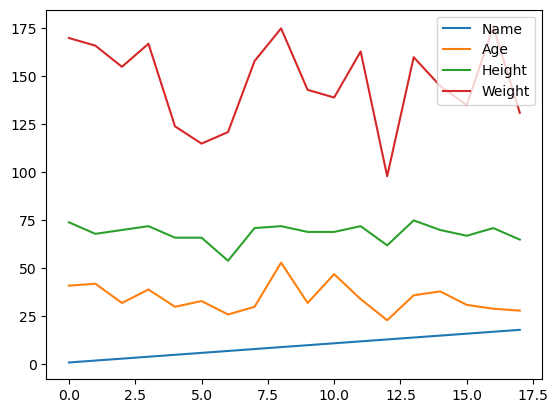

In [ ]:
names = ["Name", "Age", "Height", "Weight"]
data = test_2[names]
plt.plot(data, label=names)
plt.legend()

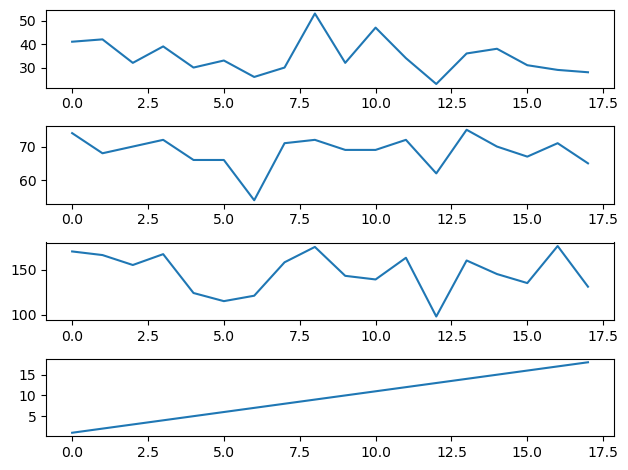

In [ ]:
fig, ax = plt.subplots(4, 1)
ax = ax.flatten()
ax[0].plot(data["Age"])
ax[1].plot(data["Height"])
ax[2].plot(data["Weight"])
ax[3].plot(data["Name"])
fig.tight_layout()

C:\Users\steen\AppData\Local\Temp\ipykernel_31064\4000187981.py:10: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  fig.tight_layout()


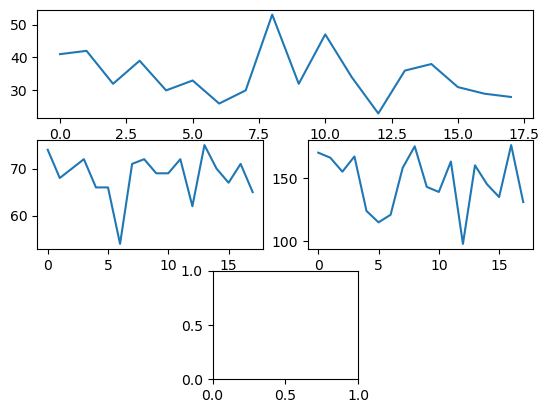

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 2, 3)
ax3 = fig.add_subplot(3, 2, 4)
ax4 = fig.add_subplot(3, 3, 8)

ax1.plot(data["Age"])
ax2.plot(data["Height"])
ax3.plot(data["Weight"])
fig.tight_layout()